In [11]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

4096it [02:09, 31.61it/s]


[[0.90788684 1.11087397 0.67048226 ... 1.0363059  1.04092268 0.68723827]
 [0.88811852 1.0005614  0.9774778  ... 0.68982852 0.90651863 0.97634331]
 [0.89496346 0.9614348  1.00515274 ... 0.70036142 0.69732799 0.97671175]
 ...
 [0.97075715 1.00022485 0.97829813 ... 1.02209995 0.91718172 0.94844117]
 [1.0130947  0.95490559 1.02816691 ... 0.93207816 1.06019916 1.03002663]
 [2.19898316 0.59993115 0.51410872 ... 1.78731775 0.69001902 0.62866782]]


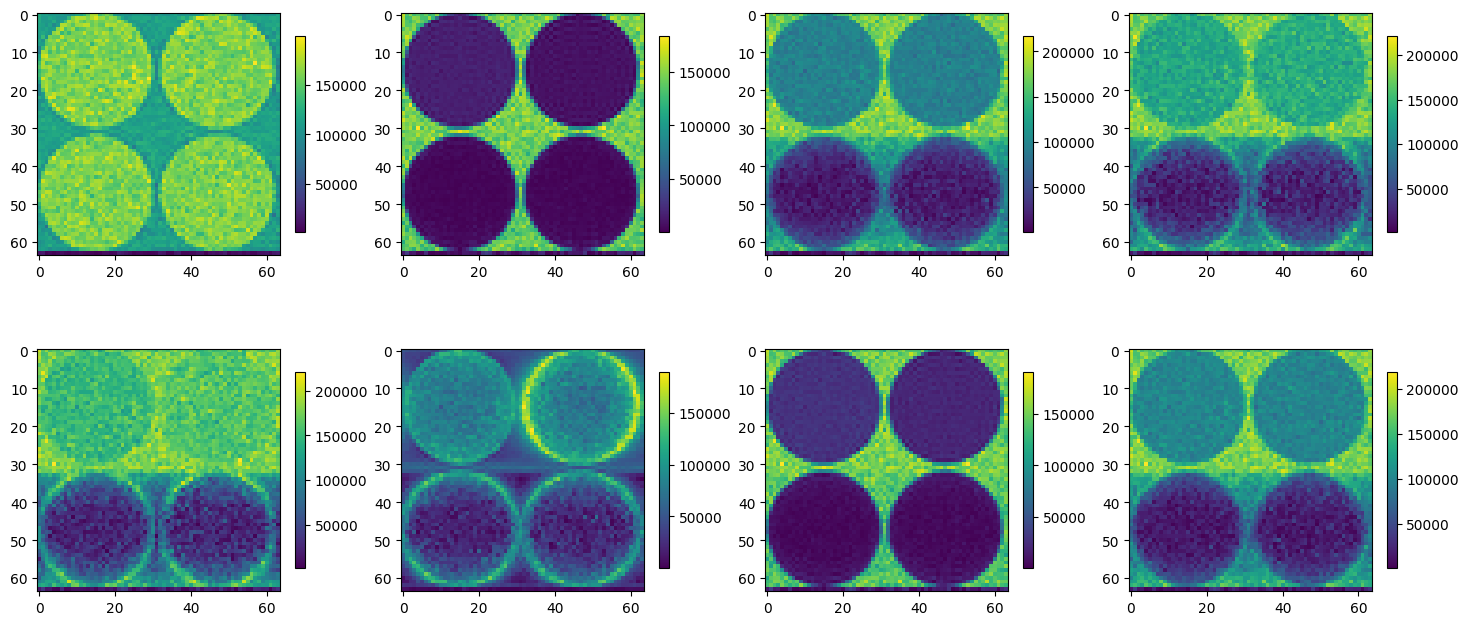

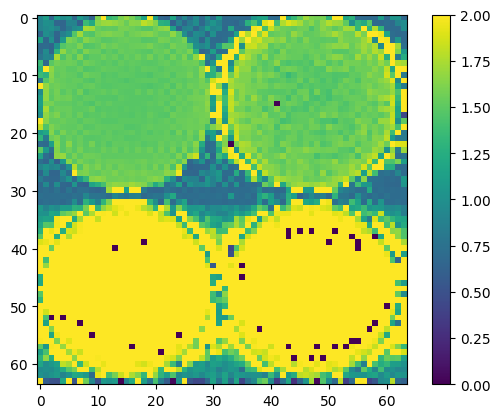

In [12]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA10_FOV320_K64_center_first", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)

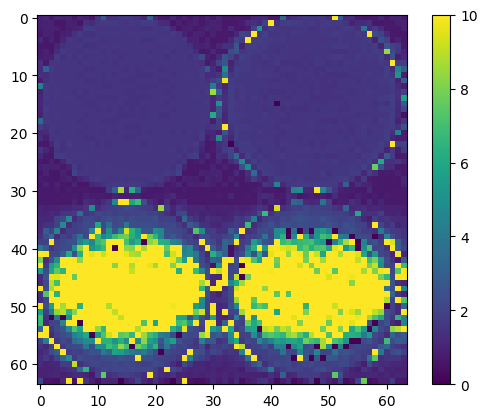

In [16]:
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,10)